In [4]:
import networkx as nx
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

colours = []

def symmetricMatrix(n):
    #Cretae a n by n matrix with each element being a random float between 0 and 1 inclusive
    A = np.random.rand(n,n)
    #Make the matrix symmetric
    symmA = (A + A.T)/2
    return symmA

def createGraph(matrix, prob):
    #Get list from 0 to the munber of rows - 1
    nodes = [i for i in range(matrix.shape[0])]  
    G = nx.Graph()
    #Add nodes to the empty graph
    G.add_nodes_from(nodes)

    #if A[i][j] is <= p then add an edge from node i to j
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            if(matrix[i][j] <= prob) and (i != j):
                G.add_edge(i, j)
    return G

In [78]:

def correctColours(G, generations):
    color = ['red', 'blue']
    colors = ['green', 'yellow', 'orange', 'black', 'grey', 'pink', 'purple', 'brown', 'cyan', 'magenta']
    nodeColors = [color[rand.randint(0, len(color)-1)] for i in range(G.number_of_nodes())]
    conflicts = []
    condition = True
    gen = 0
    colorsUsed = []
    while(condition == True):
        colorsUsed.append(len(set(nodeColors)))
        gen += 1
        numConflicts = []
        for i in range(G.number_of_nodes()):
            #For each node in G get a list of the associated edges
            edges = list(G.edges(i))
            for i in range(len(edges)):
                #If the nodes on both ends of an edge are the same color
                if(nodeColors[edges[i][0]] == nodeColors[edges[i][1]]):
                    #Chnage the color of the node that is not the current node to a differnent random color
                    #and add to the number of colflicts list
                    colorCPY = color.copy()
                    numConflicts.append(1)
                    orgcolor = nodeColors[edges[i][1]]
                    colorCPY.remove(orgcolor)
                    nodeColors[edges[i][1]] = colorCPY[rand.randint(0, len(colorCPY)-1)]
        #If there are conflicts in this iteration of the while loop then get the amount and att it to the conflicts list
        if(sum(numConflicts) > 0):
            conflicts.append(sum(numConflicts))
        else:
            #If no conflicts
            conflicts.append(0)
        #If no conflicts then end while loop
        if(conflicts[-1] == 0):
            condition = False
        if(gen == generations):
            color.append(colors[0])
            colors = colors[1:]
            gen = 0
        
    nx.draw(G, node_color=nodeColors)
    #return amount of conflicts per generation
    return conflicts, len(color), colorsUsed


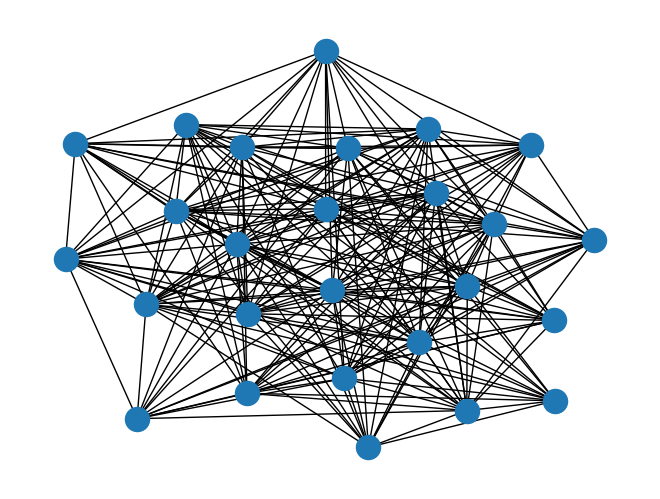

In [125]:
n = rand.randint(15, 30)
prob = 0.6
G = createGraph(symmetricMatrix(n), prob)
nx.draw(G)

In [126]:
Gcpy = G
print(Gcpy.size())
print(Gcpy.order())


222
26


10


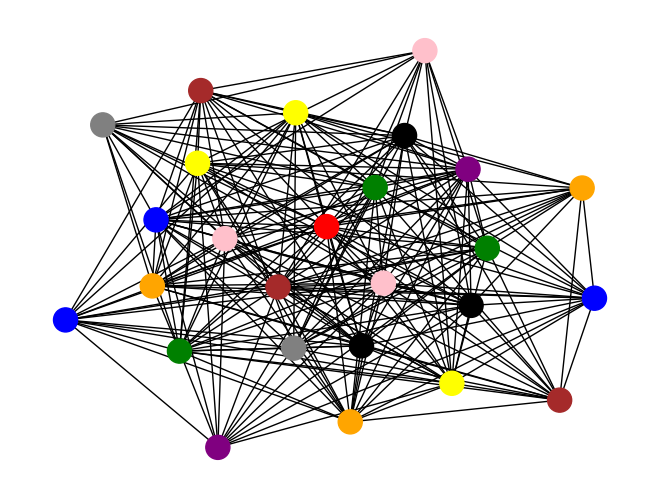

In [127]:
G2 = Gcpy
x, y, z = correctColours(G2, 1000)
print(y)

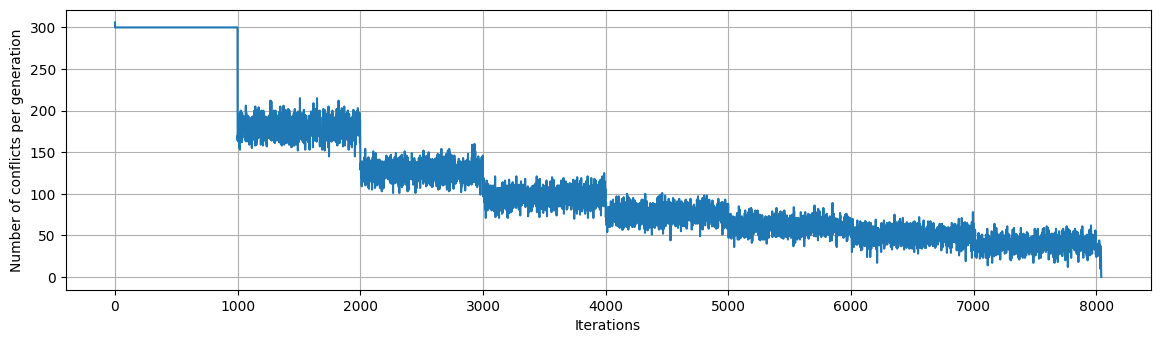

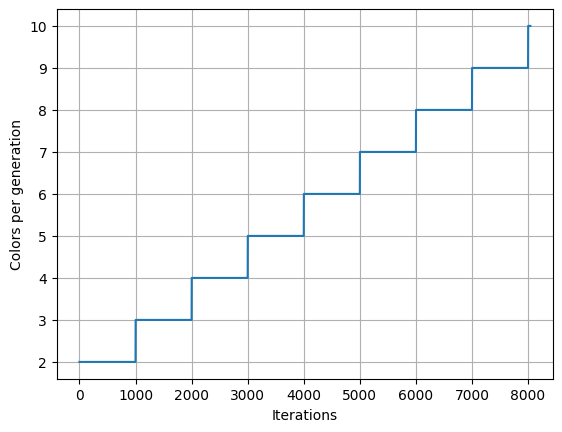

In [128]:
figure(figsize=(14,8), dpi=100)
plt.subplot(2,1,1)
plt.plot(range(len(x)), x)
plt.xlabel("Iterations")
plt.ylabel("Number of conflicts per generation")
plt.grid()
plt.show()
plt.plot(range(len(z)), z)
plt.xlabel("Iterations")
plt.ylabel("Colors per generation")
plt.grid()
plt.show()

In [129]:
def correctColoursMostConflicts(G, generations):
    color = ['red', 'blue']
    colors = ['green', 'yellow', 'orange', 'black', 'grey', 'pink', 'purple', 'brown', 'cyan', 'magenta', 'indigo', 'white']
    nodeColors = [color[rand.randint(0, len(color)-1)] for i in range(G.number_of_nodes())]
    conflicts = []
    condition = True
    gen = 0
    colorsUsed = []
    while(condition == True):
        colorsUsed.append(len(set(nodeColors)))
        conflictsPerNode = []
        gen += 1
        numConflicts = []
        for i in range(G.number_of_nodes()):
            edges = list(G.edges(i))
            con = 0
            for j in range(len(edges)):
                if(nodeColors[edges[j][0]] == nodeColors[edges[j][1]]):
                    con += 1
                    numConflicts.append(1)
            conflictsPerNode.append([i, con])

        sorted_data = sorted(conflictsPerNode, key=lambda x: x[1], reverse=True)
        top5 = [i for i in sorted_data[:10]]
        for i in top5:
            colorCPY = color.copy()
            orgcolor = nodeColors[i[0]]
            colorCPY.remove(orgcolor)
            nodeColors[i[0]] = colorCPY[rand.randint(0, len(colorCPY)-1)]

        if(sum(numConflicts) > 0):
            conflicts.append(sum(numConflicts))
        else:
            #If no conflicts
            conflicts.append(0)
        #If no conflicts then end while loop
        if(conflicts[-1] == 0):
            condition = False
        if(gen == generations):
            if(not colors):
                print("Not enough colors")
                condition = False
            else:
                color.append(colors[0])
                colors = colors[1:]
                gen = 0
        
    nx.draw(G, node_color=nodeColors)
    #return amount of conflicts per generation
    return conflicts, len(color), colorsUsed

Not enough colors
14


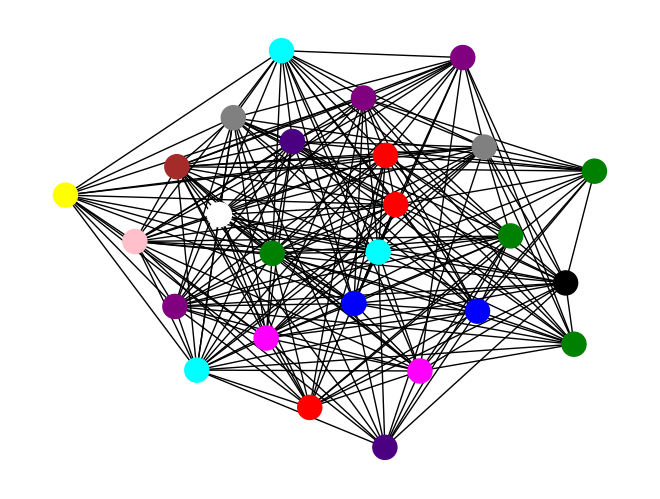

In [130]:
G3 = Gcpy
x2, y2, z2 = correctColoursMostConflicts(G3, 1000)
print(y2)

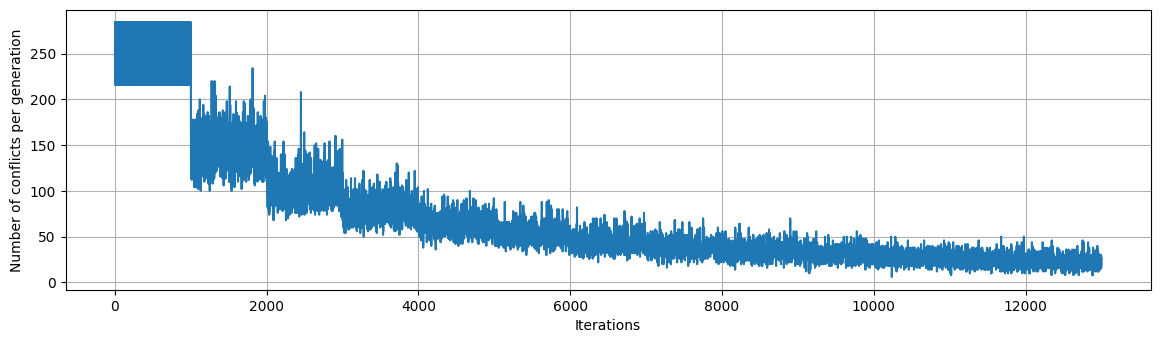

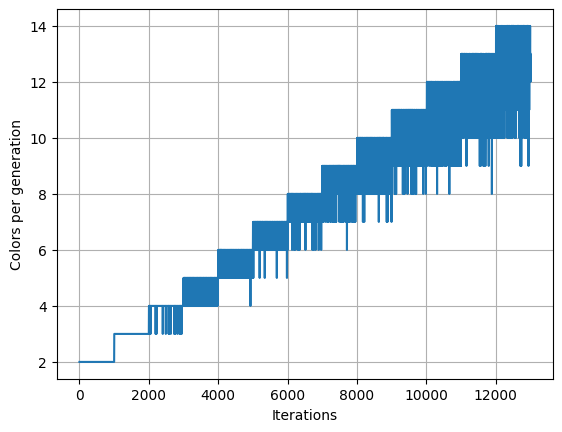

In [131]:
figure(figsize=(14,8), dpi=100)
plt.subplot(2,1,1)
plt.plot(range(len(x2)), x2)
plt.xlabel("Iterations")
plt.ylabel("Number of conflicts per generation")
plt.grid()
plt.show()
plt.plot(range(len(z2)), z2)
plt.xlabel("Iterations")
plt.ylabel("Colors per generation")
plt.grid()
plt.show()

10


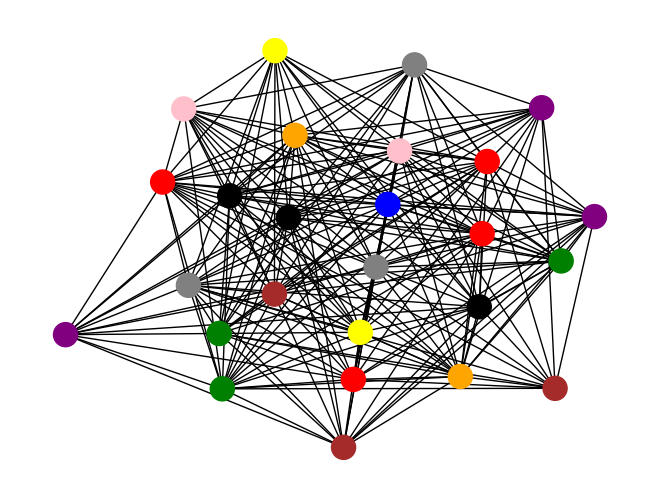

In [132]:
G3 = Gcpy
x3, y3, z3 = correctColours(G3, 1000)
print(y3)

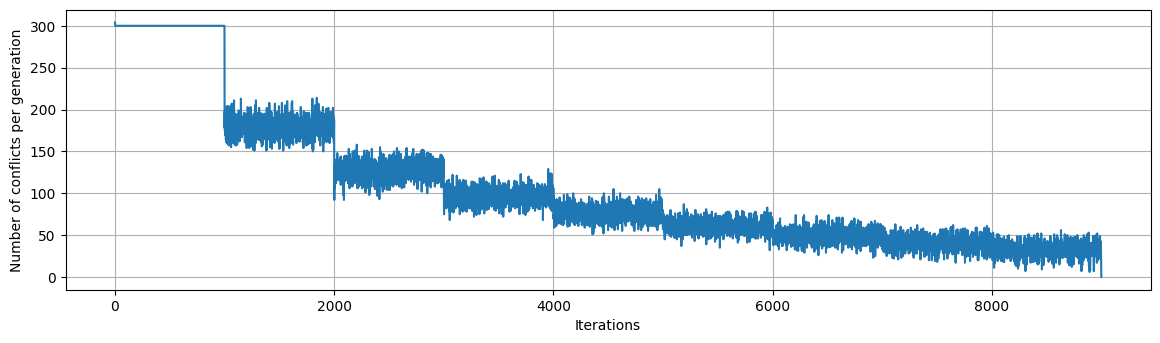

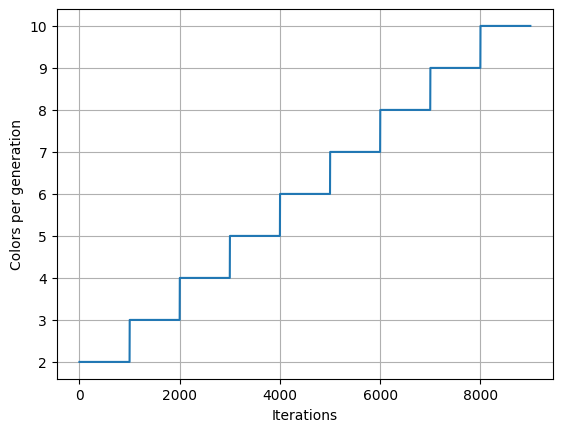

In [133]:
figure(figsize=(14,8), dpi=100)
plt.subplot(2,1,1)
plt.plot(range(len(x3)), x3)
plt.xlabel("Iterations")
plt.ylabel("Number of conflicts per generation")
plt.grid()
plt.show()
plt.plot(range(len(z3)), z3)
plt.xlabel("Iterations")
plt.ylabel("Colors per generation")
plt.grid()
plt.show()

In [134]:
def correctColoursLeastUsed(G, generations):
    color = ['red', 'blue']
    colors = ['green', 'yellow', 'orange', 'black', 'grey', 'pink', 'purple', 'brown', 'cyan', 'magenta']
    nodeColors = [color[rand.randint(0, len(color)-1)] for i in range(G.number_of_nodes())]
    conflicts = []
    condition = True
    gen = 0
    colorsUsed = []
    while(condition == True):
        colorsUsed.append(len(set(nodeColors)))
        gen += 1
        numConflicts = []
        colorCount = []
        for i in color:
            colorCount.append(nodeColors.count(i))
        

        for i in range(G.number_of_nodes()):
            #For each node in G get a list of the associated edges
            edges = list(G.edges(i))
            for i in range(len(edges)):
                #If the nodes on both ends of an edge are the same color
                if(nodeColors[edges[i][0]] == nodeColors[edges[i][1]]):
                    #and add to the number of colflicts list
                    nodeColors[edges[i][1]] = color[colorCount.index(min(colorCount))]
                    numConflicts.append(1)
        #If there are conflicts in this iteration of the while loop then get the amount and att it to the conflicts list
        if(sum(numConflicts) > 0):
            conflicts.append(sum(numConflicts))
        else:
            #If no conflicts
            conflicts.append(0)
        #If no conflicts then end while loop
        if(conflicts[-1] == 0):
            condition = False
        if(gen == generations):
            color.append(colors[0])
            colors = colors[1:]
            gen = 0
        
    nx.draw(G, node_color=nodeColors)
    #return amount of conflicts per generation
    return conflicts, len(color), colorsUsed

10


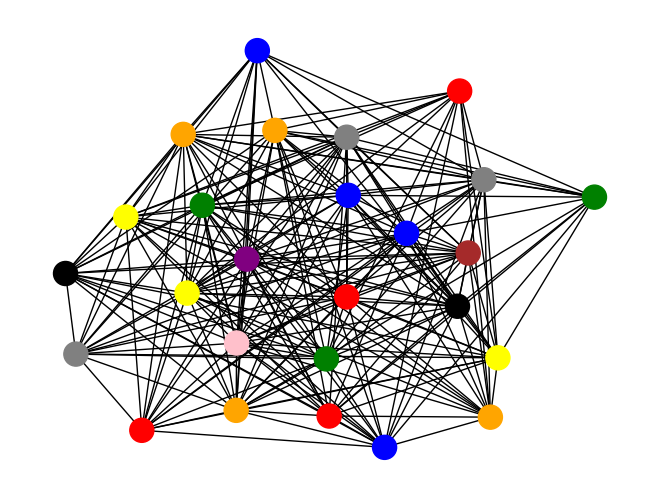

In [135]:
G3 = Gcpy
x4, y4, z4 = correctColoursLeastUsed(G3, 1000)
print(y4)

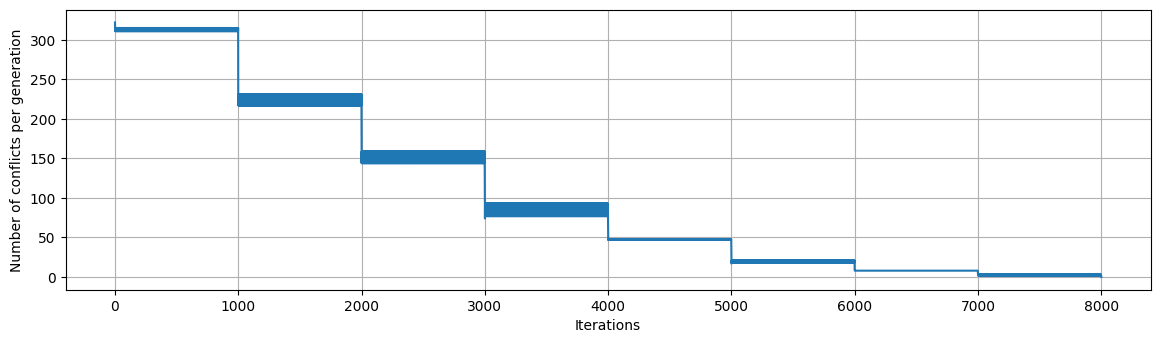

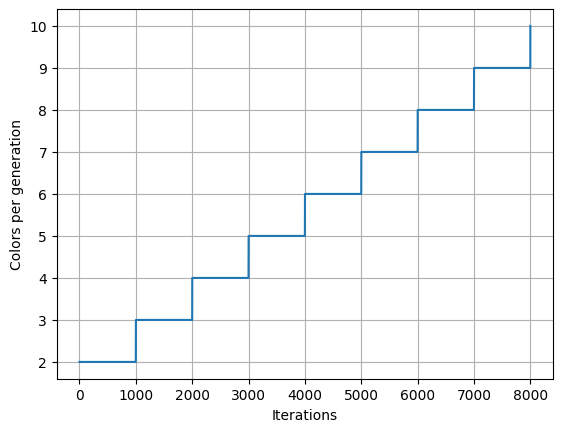

In [136]:
figure(figsize=(14,8), dpi=100)
plt.subplot(2,1,1)
plt.plot(range(len(x4)), x4)
plt.xlabel("Iterations")
plt.ylabel("Number of conflicts per generation")
plt.grid()
plt.show()
plt.plot(range(len(z4)), z4)
plt.xlabel("Iterations")
plt.ylabel("Colors per generation")
plt.grid()
plt.show()